# Práctica 3: Detectores centelladores con fotomultiplicadores

In [68]:
%pip install pandas matplotlib numpy scikit-learn scipy -q --root-user-action=ignore


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as const
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')

## Importando archivos de datos

In [70]:
bgo_cs_df = pd.read_csv('./data/BGO-137CsE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
bgo_co_df = pd.read_csv('./data/BGO-60CoE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_cs_df = pd.read_csv('./data/CsI-137Cs-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_co_df = pd.read_csv('./data/CsI-60Co-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])

## Visualización de datos

### Fuente radioactiva de 60Co

#### Detector centellador CsI(Tl)

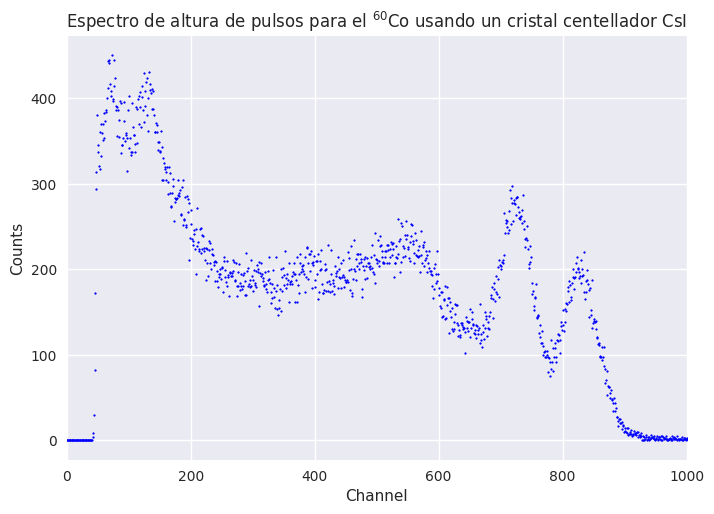

In [71]:
fig_CsI60Co, ax_CsI60Co = plt.subplots()

ax_CsI60Co.scatter(csi_co_df['Channel'], csi_co_df['Counts'], s=1.5, c='b')
ax_CsI60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_CsI60Co.set_xlabel('Channel')
ax_CsI60Co.set_ylabel('Counts')
ax_CsI60Co.set_xlim(0, 1000)
ax_CsI60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

#### Detector centellador BGO(BiGeO)

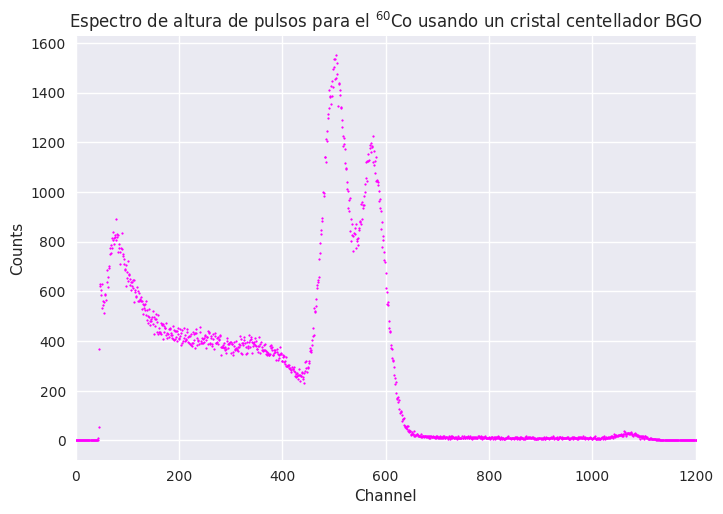

In [72]:
fig_BGO60Co, ax_BGO60Co = plt.subplots()

ax_BGO60Co.scatter(bgo_co_df['Channel'], bgo_co_df['Counts'], s=1.5, c='magenta')
ax_BGO60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_BGO60Co.set_xlabel('Channel')
ax_BGO60Co.set_ylabel('Counts')
ax_BGO60Co.set_xlim(0, 1200)
ax_BGO60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

### Fuente radioactiva de 137Cs

#### Detector centellador CsI(Tl)

(0.0, 850.0)

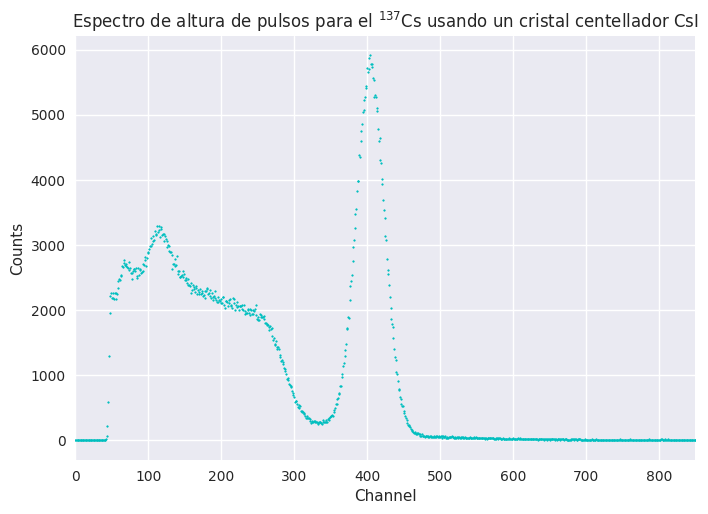

In [73]:
fig_CsI137Cs, ax_CsI137Cs = plt.subplots()

ax_CsI137Cs.scatter(csi_cs_df['Channel'], csi_cs_df['Counts'], s= 1.5, c='c')
ax_CsI137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_CsI137Cs.set_xlabel('Channel')
ax_CsI137Cs.set_ylabel('Counts')
ax_CsI137Cs.set_xlim(0, 850)

#### Detector centellador BGO(BiGeO)

(0.0, 650.0)

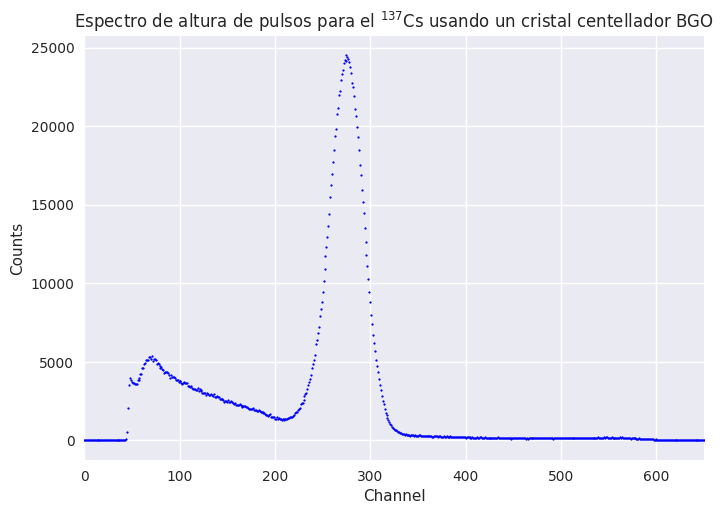

In [74]:
fig_BGO137Cs, ax_BGO137Cs = plt.subplots()

# BGO (BiGeO) with 137Cs radioactive source
ax_BGO137Cs.scatter(bgo_cs_df['Channel'], bgo_cs_df['Counts'], s= 1.5, c='b')
ax_BGO137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_BGO137Cs.set_xlabel('Channel')
ax_BGO137Cs.set_ylabel('Counts')
ax_BGO137Cs.set_xlim(0, 650)

## Análisis de datos

### Calibración de energía del detector centellador CsI(Tl)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|  137Cs  |   404   |  5910  |    661.657   |
|   60Cs  |   725   |   283  |   1173.228   |
|   60Cs  |   825   |   202  |   1332.492   |

In [75]:
csi_df = pd.DataFrame({'Channel': [404, 725, 825], 'Energy': [661.57, 1173.228, 1332.492]})
csi_df

,Channel,Energy
0,404,661.570
1,725,1173.228
2,825,1332.492


In [76]:
regr_csi = linear_model.LinearRegression()

In [77]:
regr_csi.fit(csi_df[['Channel']], csi_df['Energy'])

LinearRegression()

In [78]:
energy_pred_csi = regr_csi.predict(csi_df[['Channel']])

In [79]:
slope_csi = regr_csi.coef_[0]
intercept_csi = regr_csi.intercept_

print(f"Slope: {slope_csi:.4f}")
print(f"Intercept: {intercept_csi:.4f}")

Slope: 1.5937
Intercept: 17.7236


In [80]:
r2_csi = r2_score(csi_df['Energy'], energy_pred_csi)

print(fr"$r^2$ = {r2_csi}")

$r^2$ = 0.9999999752077676


In [81]:
line = lambda x, m, b : m * x + b

In [82]:
params_csi, covm_csi = curve_fit(line, csi_df['Channel'], csi_df['Energy'], p0=[1, 1])

In [83]:
err_csi = np.sqrt(np.diag(covm_csi))

print(fr"Slope: {params_csi[0]:.4f} $\pm$ {err_csi[0]:.7f}")
print(f"Intercept: {params_csi[1]:.4f} +- {err_csi[1]:.4f}")

Slope: 1.5937 $\pm$ 0.0002509
Intercept: 17.7236 +- 0.1695


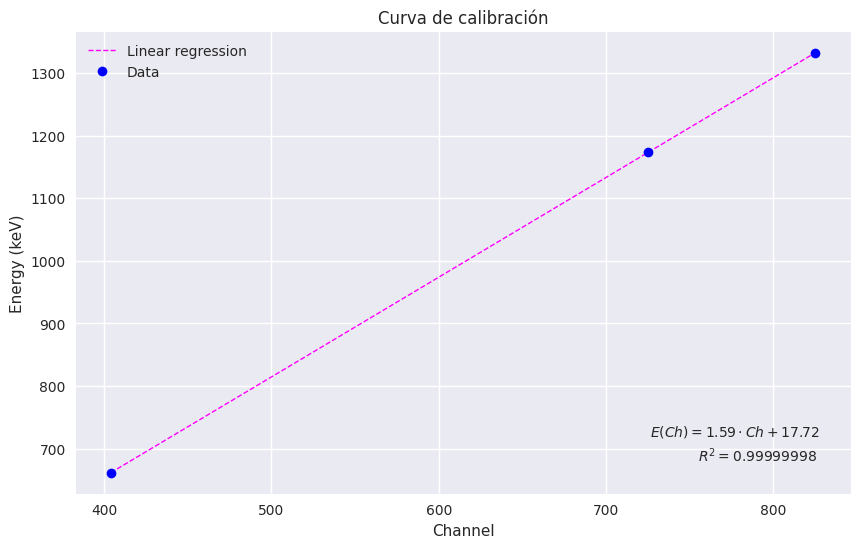

In [84]:
ChannelCsI = csi_df['Channel']
EnergyCsI = csi_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCsI, energy_pred_csi, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCsI, EnergyCsI, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_csi:.2f} \cdot Ch + {intercept_csi:.2f}$',
    xy=(726, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_csi:.8f}$',
    xy=(755, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

#### Curva de calibración para el detector centellador CsI(Tl)

La curva de calibración es

$$
    E(\text{Ch}) = (1.5937 \pm 0.002509) \cdot \text{Ch} + (17.7236 \pm 0.1695)
$$

### Calibración de energía del detector centellador BGO(BiGeO)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|   60Co  |   502   |  1457  |   1173.228   |
|   60Co  |   572   |  1160  |   1332.492   |
|  137Cs  |   272   |  24167 |    661.657   |

In [85]:
bgo_df = pd.DataFrame({'Channel': [502, 572, 272], 'Energy': [1173.228, 1332.492, 661.657]})
bgo_df

,Channel,Energy
0,502,1173.228
1,572,1332.492
2,272,661.657


In [86]:
regr_bgo = linear_model.LinearRegression()

In [87]:
regr_bgo.fit(bgo_df[['Channel']], bgo_df['Energy'])

LinearRegression()

In [88]:
energy_pred_bgo = regr_bgo.predict(bgo_df[['Channel']])

In [89]:
slope_bgo = regr_bgo.coef_[0]
intercept_bgo = regr_bgo.intercept_

print(f"Slope: {slope_bgo:.4f}")
print(f"Intercept: {intercept_bgo:.4f}")

Slope: 2.2332
Intercept: 53.8501


In [90]:
r2_bgo = r2_score(bgo_df['Energy'], energy_pred_bgo)

print(fr"$r^2$ = {r2_bgo}")

$r^2$ = 0.9999814498094657


In [91]:
params_bgo, covm_bgo = curve_fit(line, bgo_df['Channel'], bgo_df['Energy'], p0=[1, 1])

In [92]:
err_bgo = np.sqrt(np.diag(covm_bgo))

print(fr"Slope: {params_bgo[0]:.4f} $\pm$ {err_bgo[0]:.6f}")
print(f"Intercept: {params_bgo[1]:.4f} +- {err_bgo[1]:.4f}")

Slope: 2.2332 $\pm$ 0.009618
Intercept: 53.8501 +- 4.4880


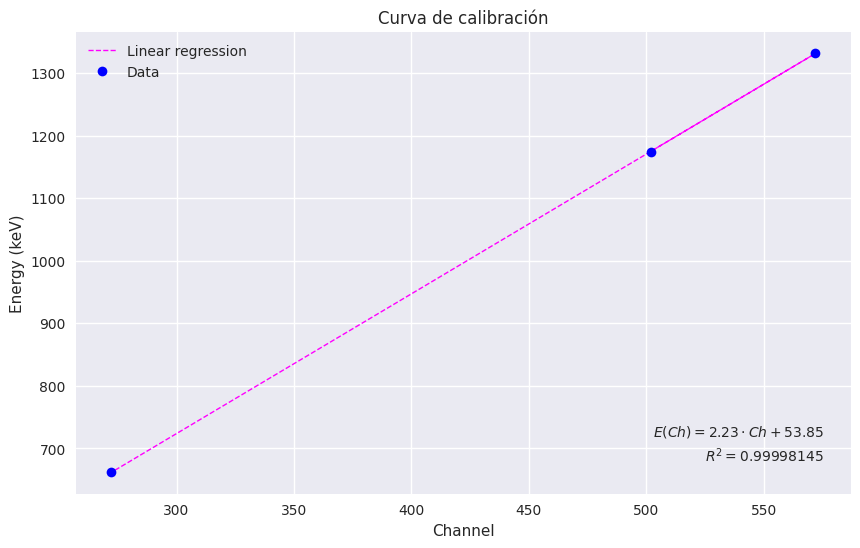

In [93]:
ChannelCal = bgo_df['Channel']
EnergyCal = bgo_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCal, energy_pred_bgo, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCal, EnergyCal, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_bgo:.2f} \cdot Ch + {intercept_bgo:.2f}$',
    xy=(503, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_bgo:.8f}$',
    xy=(525, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

#### Curva de calibración para el detector centellador BGO (BiGeO)

La curva de calibración es

$$
    E(\text{Ch}) = (2.2332 \pm 0.009618) \cdot \text{Ch} + (53.8501 \pm 4.4880)
$$

## Espectros de energía

### Detector centellador CsI(Tl)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

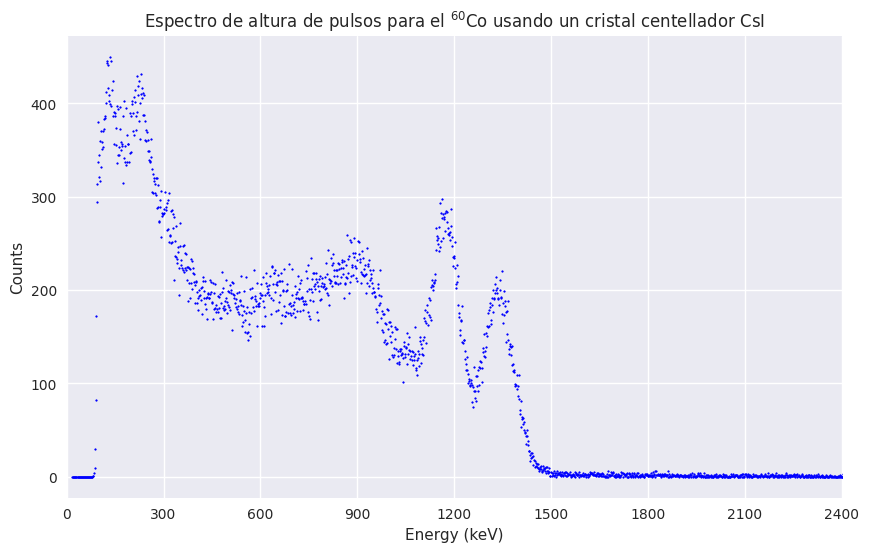

In [94]:
csi_co_df['Energy'] = line(csi_co_df['Channel'], slope_csi, intercept_csi)
EnergyCsICo = csi_co_df['Energy']
CountsCsICo = csi_co_df['Counts']

fig_energy_CsICo, ax_energy_CsICo = plt.subplots(figsize=(10, 6))
# ax_energy_CsICo.plot(EnergyCsICo, CountsCsICo, 'b', mfc='k', lw=1)
ax_energy_CsICo.scatter(EnergyCsICo, CountsCsICo, s= 1.5, c='b')
ax_energy_CsICo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_energy_CsICo.set_xlabel('Energy (keV)')
ax_energy_CsICo.set_ylabel('Counts')
ax_energy_CsICo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1500.0)

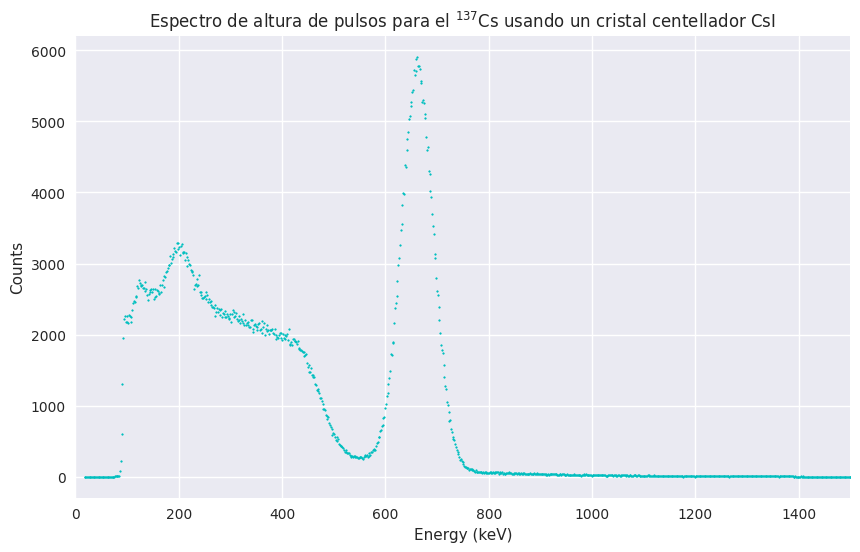

In [95]:
csi_cs_df['Energy'] = line(csi_cs_df['Channel'], slope_csi, intercept_csi)
EnergyCsICs = csi_cs_df['Energy']
CountsCsICs = csi_cs_df['Counts']

fig_energy_CsICs, ax_energy_CsICs = plt.subplots(figsize=(10, 6))
# ax_energy_CsICs.plot(EnergyCsICs, CountsCsICs, 'b', mfc='k', lw=1)
ax_energy_CsICs.scatter(EnergyCsICs, CountsCsICs, s= 1.5, c='c')
ax_energy_CsICs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_energy_CsICs.set_xlabel('Energy (keV)')
ax_energy_CsICs.set_ylabel('Counts')
# ax_energy_CsICs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICs.set_xlim(0, 1500)

### Detector centellador BGO (BiGeO)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

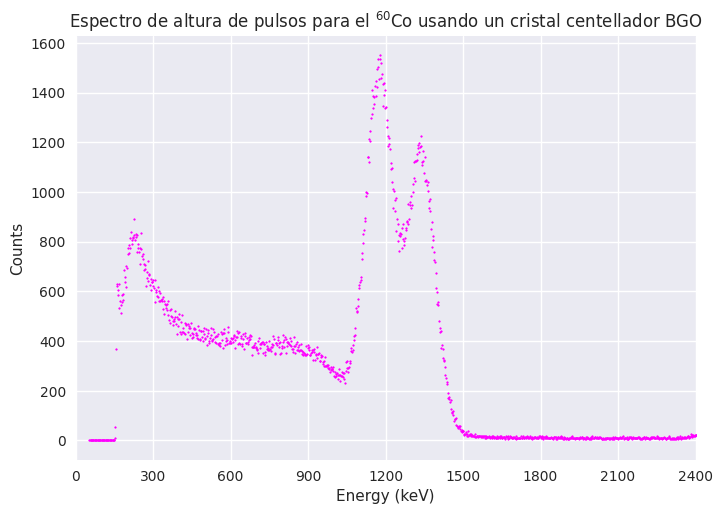

In [96]:
bgo_co_df['Energy'] = line(bgo_co_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCo = bgo_co_df['Energy']
CountsBGOCo = bgo_co_df['Counts']

fig_energy_BGOCo, ax_energy_BGOCo = plt.subplots()
# ax_energy_BGOCo.plot(EnergyBGOCo, CountsBGOCo, 'b', mfc='k', lw=1)
ax_energy_BGOCo.scatter(EnergyBGOCo, CountsBGOCo, s= 1.5, c='magenta')
ax_energy_BGOCo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_energy_BGOCo.set_xlabel('Energy (keV)')
ax_energy_BGOCo.set_ylabel('Counts')
ax_energy_BGOCo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1600.0)

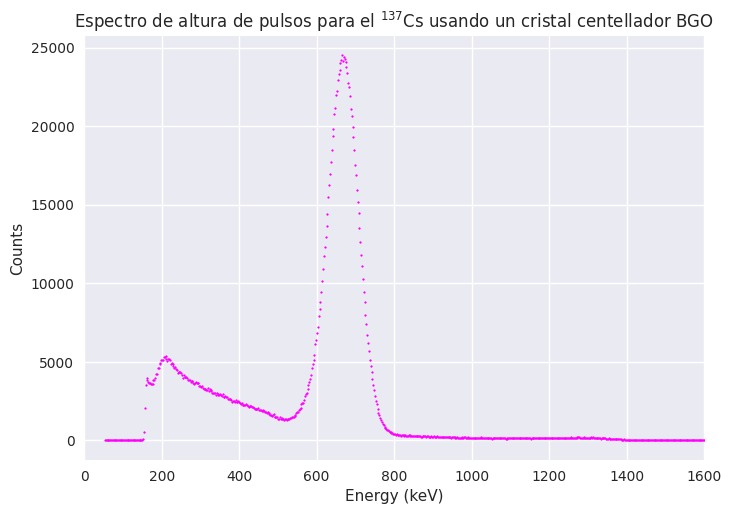

In [97]:
bgo_cs_df['Energy'] = line(bgo_cs_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCs = bgo_cs_df['Energy']
CountsBGOCs = bgo_cs_df['Counts']

fig_energy_BGOCs, ax_energy_BGOCs = plt.subplots()
# ax_energy_BGOCs.plot(EnergyBGOCs, CountsBGOCs, 'b', mfc='k', lw=1)
ax_energy_BGOCs.scatter(EnergyBGOCs, CountsBGOCs, s= 1.5, c='magenta')
ax_energy_BGOCs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_energy_BGOCs.set_xlabel('Energy (keV)')
ax_energy_BGOCs.set_ylabel('Counts')
# ax_energy_BGOCs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCs.set_xlim(0, 1600)

## Ajuste de distribuciones Gaussianas

Puesto que deseamos conocer la resolución de cada uno de los detectores, es necesario ajustar las distribuciones Gaussianas de cada uno de los picos de energía.

Recordemos que la forma general de una Gaussiana es:

$$
    G(x, A, \mu, \sigma) = A \text{e}^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^{2}},
$$

donde $A = \frac{1}{\sqrt{2\pi} \cdot \sigma}$.

In [98]:
G = lambda x, A, mu, sigma: A * np.exp(- pow(x - mu, 2) / (2 * pow(sigma, 2)))

In [99]:
class PulseAnalysis:
    def __init__(self, df):
        self.df = df
        self.energy = df['Energy']
        self.counts = df['Counts']

    def gaussian_distribution(self, min_energy, max_energy):
        ditribution_df = self.df[(self.df['Energy'] > min_energy) & (self.df['Energy'] < max_energy)]
        energy = ditribution_df['Energy']
        counts = ditribution_df['Counts']

        return energy, counts
    
    def G(self, x, A, mu, sigma):
        return A * np.exp(- pow(x - mu, 2) / (2 * pow(sigma, 2)))

    def gaussian_fit(self, min_energy, max_energy, p0):
        energy, counts = self.gaussian_distribution(min_energy, max_energy)
        popt, pcov = curve_fit(self.G, energy, counts, p0=p0)
        centroid = popt[1]

        return popt, pcov, centroid
    
    def errors_fit(self, pcov):
        err = np.sqrt(np.diag(pcov))

        return err    
    
    def energy_spectrum_fit(self, plots_params, title=None, x_label=None, y_label=None, xlim=None):
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.scatter(self.energy, self.counts, s= 1.5, c='k')
        
        for params in plots_params:
            energyModel = np.linspace(params['min_energy'], params['max_energy'], 1000)
            popt = params['popt']
            color = params['color']
            
            ax.plot(energyModel, self.G(energyModel, *popt), color=color, lw=1)
            ax.fill_between(energyModel, self.G(energyModel, *popt), color=color, alpha=0.5)

        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        if xlim:
            ax.set_xlim(xlim)

        fig.suptitle(title)

### Detector centellador CsI(Tl)

#### Fuente radioactiva de 60Co

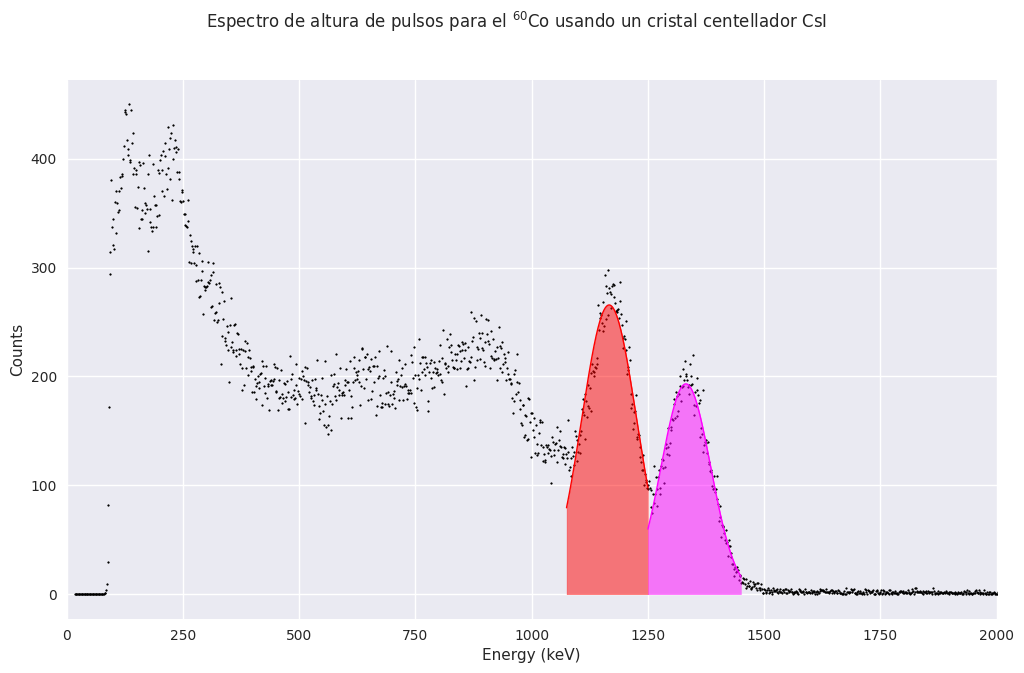

In [100]:
plot_params_csi_co = [
    {'min_energy': 1075, 'max_energy': 1250, 'popt': [], 'color': 'r'},
    {'min_energy': 1250, 'max_energy': 1450, 'popt': [], 'color': 'magenta'},
]

pulseAnalysisCsICo = PulseAnalysis(csi_co_df)

# First peak
co1CsIpopt, co1CsIpcov, centroidCsICo1 = pulseAnalysisCsICo.gaussian_fit(plot_params_csi_co[0]['min_energy'], plot_params_csi_co[0]['max_energy'], [300, 1175, 1])
co1CsIErr = pulseAnalysisCsICo.errors_fit(co1CsIpcov)
plot_params_csi_co[0]['popt'] = co1CsIpopt

# Second peak
co2CsIpopt, co2CsIpcov, centroidCsICo2 = pulseAnalysisCsICo.gaussian_fit(plot_params_csi_co[1]['min_energy'], plot_params_csi_co[1]['max_energy'], [220, 1330, 1])
co2CsIErr = pulseAnalysisCsICo.errors_fit(co2CsIpcov)
plot_params_csi_co[1]['popt'] = co2CsIpopt

# Energy spectrum with gaussian fit
pulseAnalysisCsICo.energy_spectrum_fit(plot_params_csi_co, title=r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI', x_label='Energy (keV)', y_label='Counts', xlim=(0, 2000))

#### Fuente radioactiva de 137Cs

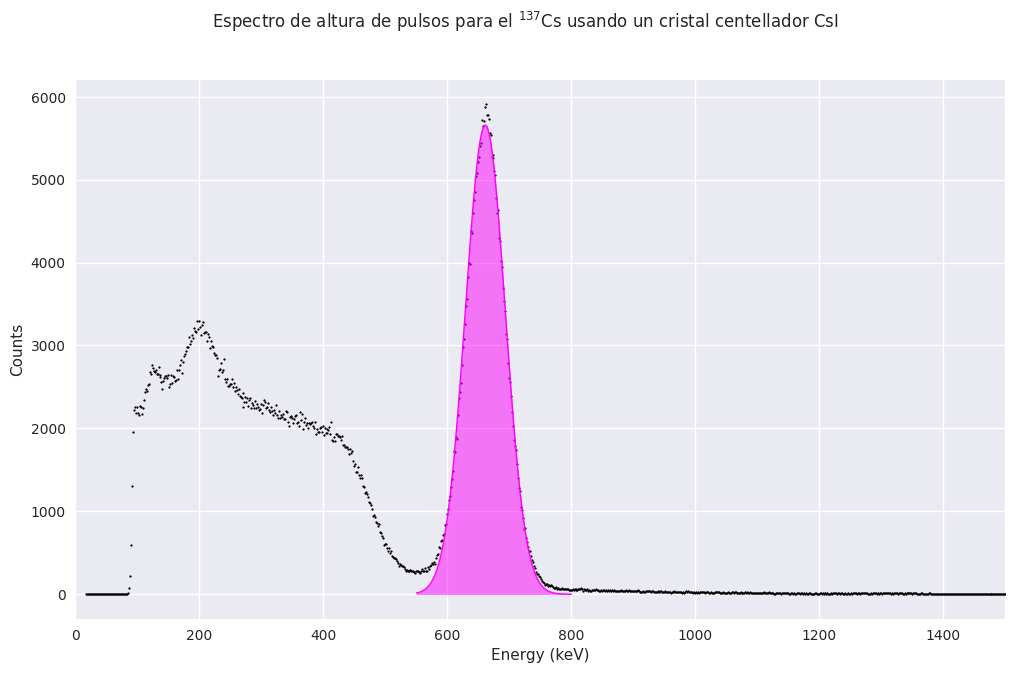

In [101]:
plot_params_csi_cs = [
    {'min_energy': 550, 'max_energy': 800, 'popt': [], 'color': 'magenta'},
]

pulseAnalysisCsICs = PulseAnalysis(csi_cs_df)

csCsIpopt, csCsIpcov, centroidCsICs = pulseAnalysisCsICs.gaussian_fit(plot_params_csi_cs[0]['min_energy'], plot_params_csi_cs[0]['max_energy'], [6000, 650, 1])
csCsIErr = pulseAnalysisCsICs.errors_fit(csCsIpcov)
plot_params_csi_cs[0]['popt'] = csCsIpopt

# Energy spectrum with gaussian fit plot
pulseAnalysisCsICs.energy_spectrum_fit(plot_params_csi_cs, title=r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI', x_label='Energy (keV)', y_label='Counts', xlim=(0, 1500))

### Detector centellador BGO (BiGeO)

#### Fuente radioactiva de 60Co

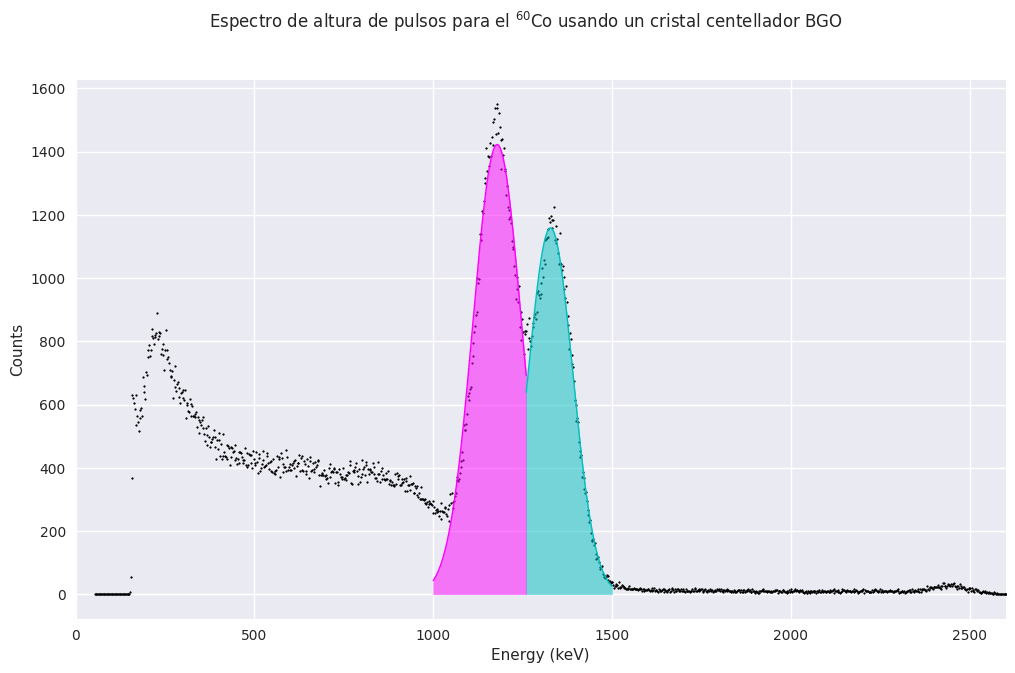

In [102]:
plot_params_bgo_co = [
    {'min_energy': 1000, 'max_energy': 1260, 'popt': [], 'color': 'magenta'},
    {'min_energy': 1260, 'max_energy': 1500, 'popt': [], 'color': 'c'},
]

pulseAnalysisBGOCo = PulseAnalysis(bgo_co_df)

# First peak
co1BGOpopt, co1BGOpcov, centroidBGOCo1 = pulseAnalysisBGOCo.gaussian_fit(plot_params_bgo_co[0]['min_energy'], plot_params_bgo_co[0]['max_energy'], [1580, 1175, 1])
co1BGOErr = pulseAnalysisBGOCo.errors_fit(co1CsIpcov)
plot_params_bgo_co[0]['popt'] = co1BGOpopt

# Second peak
co2BGOpopt, co2BGOpcov, centroidBGOCo2 = pulseAnalysisBGOCo.gaussian_fit(plot_params_bgo_co[1]['min_energy'], plot_params_bgo_co[1]['max_energy'], [1200, 1330, 1])
co2BGOErr = pulseAnalysisBGOCo.errors_fit(co2CsIpcov)
plot_params_bgo_co[1]['popt'] = co2BGOpopt

# Energy spectrum with gaussian fit
pulseAnalysisBGOCo.energy_spectrum_fit(plot_params_bgo_co, title=r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO', x_label='Energy (keV)', y_label='Counts', xlim=(0, 2600))


#### Fuente radioactiva de 137Cs

Realizamos el ajuste a la distribución Gaussiana, cuyo pico se encuentra aproximandamente en $650$ keV.

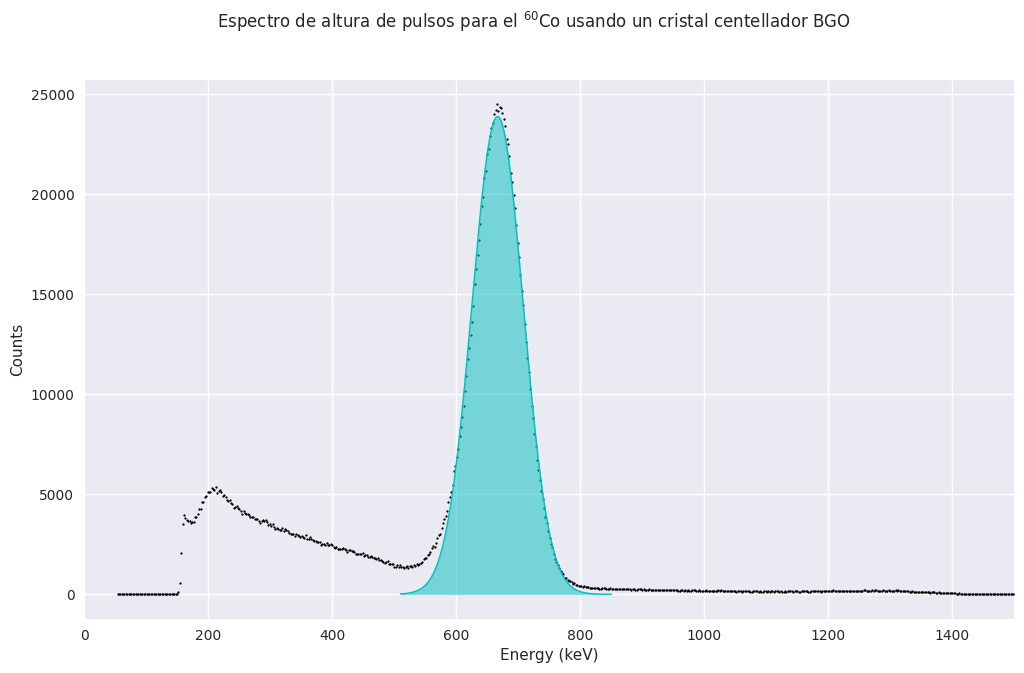

In [103]:
bgo_cs_mu_df = bgo_cs_df[(bgo_cs_df['Energy'] > 510) & (bgo_cs_df['Energy'] < 850)]
plot_params_bgo_cs = [
    {'min_energy': 510, 'max_energy': 850, 'popt': [], 'color': 'c'},
]

pulseAnalysisBGOCs = PulseAnalysis(bgo_cs_df)

csBGOpopt, csBGOpcov, centroidBGOCs = pulseAnalysisBGOCs.gaussian_fit(plot_params_bgo_cs[0]['min_energy'], plot_params_bgo_cs[0]['max_energy'], [25000, 666, 1])
csBGOErr = pulseAnalysisBGOCs.errors_fit(csCsIpcov)
plot_params_bgo_cs[0]['popt'] = csBGOpopt

# Energy spectrum with gaussian fit
pulseAnalysisBGOCs.energy_spectrum_fit(plot_params_bgo_cs, title=r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO', x_label='Energy (keV)', y_label='Counts', xlim=(0, 1500))

## Resolución de los detectores

In [104]:
centroids = [centroidCsICo1, centroidCsICo2, centroidCsICs, centroidBGOCo1, centroidBGOCo2, centroidBGOCs]

print("Centroides de CsI")
for i, centroid in enumerate(centroids):
    if i == 3:
        print("Centroides de BGO")
    print(f"Centroide o E0 = {centroid:.2f} keV")

Centroides de CsI
Centroide o E0 = 1166.67 keV
Centroide o E0 = 1331.65 keV
Centroide o E0 = 661.10 keV
Centroides de BGO
Centroide o E0 = 1178.78 keV
Centroide o E0 = 1327.84 keV
Centroide o E0 = 666.77 keV


In [105]:
def resolution(sigma, centroid):
         return 100 * 2.35 * sigma / centroid

### Cálculo de la resolución

El cálculo de la resolución se realiza mediante la siguiente expresión:	

$$
    R = \dfrac{\text{FWHM}}{E_{0}} \cdot 100\ \%,
$$

donde $\text{FWHM} = 2.35\sigma$.

Ahora que ya hemos calculado el centroide de cada uno de los espectros, podemos calcular la resolución de cada uno de los detectores.

> La resolución que se debe considerar para cada uno de los detectores es la calculada para el 137Cs.

#### Detector centellador CsI(Tl)

|  Isotope  |  $\mu$  |   Error  |
|-----------|---------|----------|
|   60Co 1  | 1166.67 |  0.8541  |
|   60Co 2  | 1331.65 |  0.7037  |
|   137Cs   |  661.10 |  0.1512  |

In [106]:
centroids_csi = np.array([centroidCsICo1, centroidCsICo2, centroidCsICs])
sigmas_csi = np.array([co1CsIErr[2], co2CsIErr[2], csCsIErr[2]])
isotopes_csi = np.array(['Co1', 'Co2', 'Cs'])

resolutions_csi = resolution(sigmas_csi, centroids_csi)

for isotope, res in enumerate(resolutions_csi):
    print(f"La resolución para el isótopo {isotopes_csi[isotope]} es {res:.4f}%")

La resolución para el isótopo Co1 es 0.2266%
La resolución para el isótopo Co2 es 0.1408%
La resolución para el isótopo Cs es 0.0537%


In [107]:
print(f"La resolución promedio del detector centellador CsI es: {np.average(resolutions_csi):.4f} %")

La resolución promedio del detector centellador CsI es: 0.1404 %


#### Detector centellador BGO (BiGeO)

|  Isotope  |  $\mu$  |   Error  |
|-----------|---------|----------|
|   60Co 1  | 1178.78 |  1.0306  |
|   60Co 2  | 1327.84 |  0.6307  |
|   137Cs   |  666.77 |  0.2947  |

In [108]:
centroids_bgo = np.array([centroidBGOCo1, centroidBGOCo2, centroidBGOCs]) 
sigmas_bgo = np.array([co1BGOErr[2], co2BGOErr[2], csBGOErr[2]])
isotopes_bgo = np.array(['Co1', 'Co2', 'Cs'])

resolutions_bgo = resolution(sigmas_bgo, centroids_bgo)

for isotope, res in enumerate(resolutions_bgo):
    print(f"La resolución para el isótopo {isotopes_bgo[isotope]} es {res:.4f}%")

La resolución para el isótopo Co1 es 0.2243%
La resolución para el isótopo Co2 es 0.1412%
La resolución para el isótopo Cs es 0.0533%


In [109]:
print(f"La resolución promedio del detector centelledar BGO es: {np.average(resolutions_bgo):.4f} %")

La resolución promedio del detector centelledar BGO es: 0.1396 %


## Hombro Compton

La cantidad de energía transmitida al material varia de acuerdo al ángulo de deflección. Es imposible que el fotón transifera más energía mediante este proceso; por lo que hay un "corte precipitado" a esa energía. Si un isótopo tiene múltiples picos, cada uno de estos picos tendrá un Hombro Compton.

$$
    \Delta E_{c} = \dfrac{E}{1 + \frac{2E}{m_{\text{e}}c^{2}}}.
$$

Y finalmente, el Hombro Compton se obtiene mediante la siguiente expresión:

$$
    E_{HC} = E - \Delta E_{c}.
$$

In [110]:
m_e = round(const.physical_constants.get('electron mass energy equivalent in MeV')[0], 3) * 1000

def dcompton_edge(E):
    return E / (1 + (2 * E / m_e))

def compton_edge(E, dE):
    return E - dE

### Compton Edge CsI

In [111]:
gammas_csi = csi_df['Energy'].to_numpy()
gamma_co1_csi, gamma_co2_csi = gammas_csi[1:]  
gamma_cs_csi = gammas_csi[0]

# Delta Compton Edge
de_compton_co1_csi = dcompton_edge(gamma_co1_csi)
de_compton_co2_csi = dcompton_edge(gamma_co2_csi)
de_compton_cs_csi = dcompton_edge(gamma_cs_csi)

# Compton Edge
e_compton_co1_csi = compton_edge(gamma_co1_csi, de_compton_co1_csi)
e_compton_co2_csi = compton_edge(gamma_co2_csi, de_compton_co2_csi)
e_compton_cs_csi = compton_edge(gamma_cs_csi, de_compton_cs_csi)

print("DeltaEc")
print(f"{de_compton_cs_csi:.2f}")
print(f"{de_compton_co1_csi:.2f}")
print(f"{de_compton_co2_csi:.2f}")

print("Ec")
print(f"{e_compton_co1_csi:.2f}")
print(f"{e_compton_co2_csi:.2f}")
print(f"{e_compton_cs_csi:.2f}")

DeltaEc
184.32
209.81
214.39
Ec
963.42
1118.10
477.25


Tenemos que el _Compton edge_ para el CsI(Tl) es

$$
\begin{align*}
    E_{\text{Compton}}^{{}^{60}\text{Co}} &= 963.42\ \text{keV},\\
    E_{\text{Compton}}^{{}^{137}\text{Cs}} &= 477.25\ \text{keV}.
\end{align*}
$$

### Compton Edge BGO

In [112]:
gammas_bgo = bgo_df['Energy'].to_numpy()
gamma_co1_bgo, gamma_co2_bgo = gammas_bgo[:2]
gamma_cs_bgo = gammas_bgo[2]

# Delta Compton Edge
de_compton_co1_bgo = dcompton_edge(gamma_co1_bgo)
de_compton_co2_bgo = dcompton_edge(gamma_co2_bgo)
de_compton_cs_bgo = dcompton_edge(gamma_cs_bgo)

# Compton Edge
e_compton_co1_bgo = compton_edge(gamma_co1_bgo, de_compton_co1_bgo)
e_compton_co2_bgo = compton_edge(gamma_co2_bgo, de_compton_co2_bgo)
e_compton_cs_bgo = compton_edge(gamma_cs_bgo, de_compton_cs_bgo)

print("DeltaEc")
print(f"{de_compton_co1_bgo:.2f}")
print(f"{de_compton_co2_bgo:.2f}")
print(f"{de_compton_cs_bgo:.2f}")
print("Ec")
print(f"{e_compton_co1_bgo:.2f}")
print(f"{e_compton_co2_bgo:.2f}")
print(f"{e_compton_cs_bgo:.2f}")

DeltaEc
209.81
214.39
184.32
Ec
963.42
1118.10
477.33


Tenemos que el _Compton edge_ para el BGO(BiGeO) es

$$
\begin{align*}
    E_{\text{Compton}}^{{}^{60}\text{Co}} &= 963.42\ \text{keV},\\
    E_{\text{Compton}}^{{}^{137}\text{Cs}} &= 477.33\ \text{keV}.
\end{align*}
$$

### _Compton edge_ para el 60Co usando el detector centellador CsI(Tl)

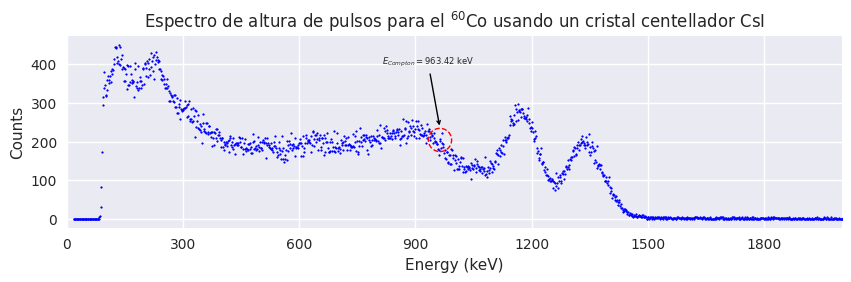

In [113]:
circle_co_csi = patches.Circle((e_compton_co1_csi, 204), radius=30, ls='--', fill=0, color='r', lw=1)

fig_energy_CsICo.gca().add_patch(circle_co_csi)
ax_energy_CsICo.set_aspect('equal')
ax_energy_CsICo.set_xlim(0, 2000)
# ax_energy_CsICo.set_ylim(0, 500)
ax_energy_CsICo.annotate(r'$E_{Compton} = 963.42$ keV', xy=(e_compton_co1_csi, 234), xytext=(e_compton_co1_csi - 150, 400), fontsize=6, arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=1))

fig_energy_CsICo

### _Compton edge_ para el 137Cs usando el detector centellador CsI(Tl)

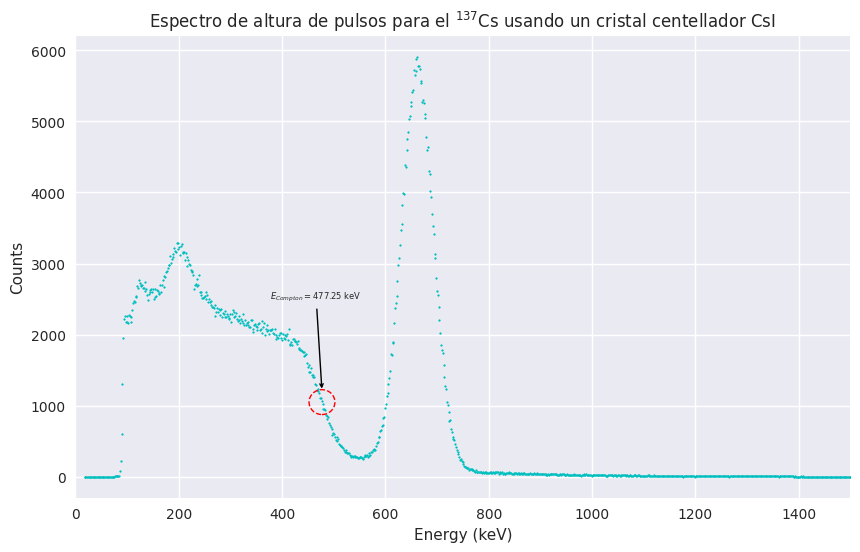

In [114]:
circle_cs_csi = patches.Ellipse((e_compton_cs_csi, 1050), width=50, height= 350, ls='--', fill=0, color='r', lw=1)

fig_energy_CsICs.gca().add_patch(circle_cs_csi)

ax_energy_CsICs.annotate(r'$E_{Compton} = 477.25$ keV', xy=(e_compton_cs_csi, 1200), xytext=(e_compton_cs_csi - 100, 2500), fontsize=6, arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=1))

fig_energy_CsICs

### _Compton edge_ para el 60Co usando el detector centellador BGO(BiGeO)

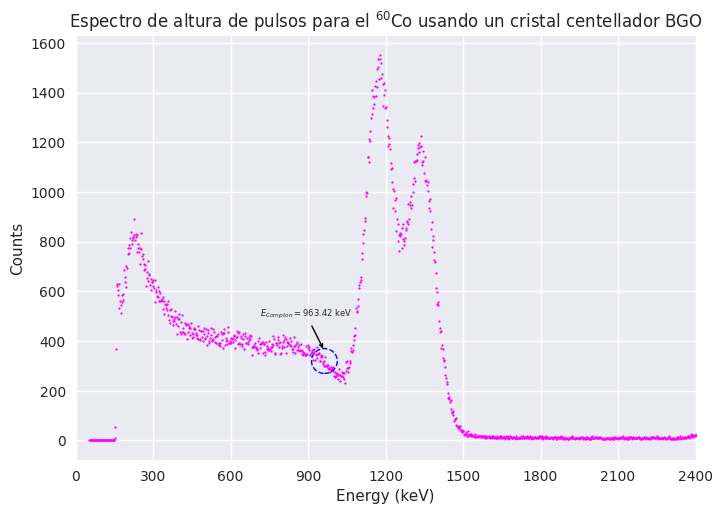

In [115]:
circle_co_bgo = patches.Ellipse((e_compton_co1_bgo, 320), width=100, height= 100, ls='--', fill=0, color='b', lw=1)

fig_energy_BGOCo.gca().add_patch(circle_co_bgo)

ax_energy_BGOCo.annotate(r'$E_{Compton} = 963.42$ keV', xy=(e_compton_co1_bgo, 360), xytext=(e_compton_co1_bgo - 250, 500), fontsize=6, arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=1))

fig_energy_BGOCo

### _Compton edge_ para el 137Cs usando el detector centellador BGO(BiGeO)

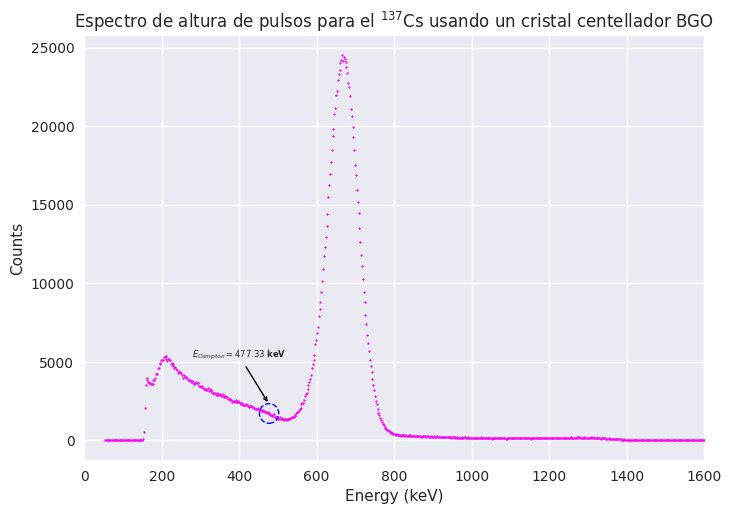

In [116]:
circle_cs_bgo = patches.Ellipse((e_compton_cs_bgo, 1718), width=50, height= 1250, ls='--', fill=0, color='b', lw=1)

fig_energy_BGOCs.gca().add_patch(circle_cs_bgo)

ax_energy_BGOCs.annotate(r'$E_{Compton} = 477.33$ keV', xy=(e_compton_cs_bgo, 2300), xytext=(e_compton_cs_bgo - 200, 5300), size=6, weight='bold', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=1))

fig_energy_BGOCs

### Error relativo para el valor del _Compton edge_

In [117]:
rel_error = lambda e_db, e_measured : 100 * abs(e_db - e_measured) / e_db

#### Error relativo para el valor del _Compton edge_ usando el detector centellador CsI(Tl)

In [130]:
e_compton_csi = np.array([e_compton_cs_csi, e_compton_co1_csi, e_compton_co2_csi])
iso_csi = np.array(['137Cs', '60Co1', '60Co2'])

for i, energy in enumerate(e_compton_csi):
    print(f"{iso_csi[i]}: {energy:.2f} keV ± {rel_error(energy, gammas_csi[i]):.2f} %")

137Cs: 477.25 keV ± 38.62 %
60Co1: 963.42 keV ± 21.78 %
60Co2: 1118.10 keV ± 19.17 %


#### Error relativo para el valor del _Compton edge_ usando el detector centellador CsI(Tl)

In [131]:
e_compton_bgo = np.array([e_compton_co1_bgo, e_compton_co2_bgo, e_compton_cs_bgo])
iso_bgo = np.array(['60Co1', '60Co2', '137Cs'])

for i, energy in enumerate(e_compton_bgo):
    print(f"{iso_bgo[i]}: {energy:.2f} keV ± {rel_error(energy, gammas_bgo[i]):.2f} %")

60Co1: 963.42 keV ± 21.78 %
60Co2: 1118.10 keV ± 19.17 %
137Cs: 477.33 keV ± 38.62 %


## Error relativo de la energía

La expresión para el error relativo es

$$
    \epsilon_{r} = \dfrac{\Delta E}{E} \cdot 100\ \%,
$$

con $\Delta E = |E_{\text{bd}} - E_{\text{medido}}|$.

### Error relativo con el detector centellador CsI(Tl)

In [118]:
energies_db = np.array([661.657, 1173.228, 1332.492])

for i, energy in enumerate(gammas_csi):
    print(f"El error relativo para la energía de {iso_csi[i]} es {rel_error(energies_db[i], energy):.2f} %")

El error relativo para la energía de 137Cs es 0.01 %
El error relativo para la energía de 60Co1 es 0.00 %
El error relativo para la energía de 60Co2 es 0.00 %


### Error relativo con el detector centellador BGO (BiGeO)

In [119]:
energiess_db = np.array([1173.228, 1332.492, 661.657])

for i, energy in enumerate(gammas_bgo):
    print(f"El error relativo para la energía de {iso_bgo[i]} es {rel_error(energiess_db[i], energy):.2f} %")

El error relativo para la energía de 60Co1 es 0.00 %
El error relativo para la energía de 60Co2 es 0.00 %
El error relativo para la energía de 137Cs es 0.00 %
